In [ ]:
## Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# **Loading the Dataset and Viewing Information**

In [ ]:
## Load the dataset (adjust the file path as needed)
file_path = "/content/Huntington_Disease_Dataset.csv"
df = pd.read_csv(file_path)

## Display the first few rows to inspect the data
print("\nFirst 10 Rows of the Dataset:")
df.head(10)


First 10 Rows of the Dataset:


,Patient_ID,Age,Sex,Family_History,HTT_CAG_Repeat_Length,Motor_Symptoms,Cognitive_Decline,Chorea_Score,Brain_Volume_Loss,Functional_Capacity,...,HTT_Gene_Expression_Level,Protein_Aggregation_Level,Random_Protein_Sequence,Random_Gene_Sequence,Disease_Stage,Gene/Factor,Chromosome_Location,Function,Effect,Category
0,b2a49170-8561-4665-9371-2240b55dd87a,31,Male,No,67,Moderate,Severe,8.80,3.20,94,...,1.67,0.58,DAHKIRSPMRVGPHYYAQCDNNDTGSDKEHWLKTEAAPMTMDRTVE...,GCCAGCAGCGCCCGAGCGTATGAGGTATATGGATTGGACATTGGGC...,Middle,HTT,4p16.3,CAG Trinucleotide Repeat Expansion,Neurodegeneration,Primary Cause
1,f5fae45d-8718-41c4-a957-6928f79f3c8e,33,Female,Yes,38,Severe,Moderate,3.24,5.98,50,...,0.18,0.30,PANGFWYHNCLRFWNIPPYVMEGFPLADITEVHKWRVSGFMCWETQ...,AGTTTTCAGTGAGACTCTTCCCCAAAAGCCTCCACTACGACAGTGT...,Pre-Symptomatic,HTT,4p16.3,CAG Trinucleotide Repeat Expansion,Neurodegeneration,Primary Cause
2,66ab0567-050b-4d56-9ec4-b676309899a6,69,Male,Yes,37,Severe,Moderate,1.01,2.82,69,...,0.90,1.04,NWHEGHGASTWKATMVAWCLMVQHAVTWKEGNTRCREMSCMNFTQL...,TATACCACCAGTGGGAAGAGTAACGATTTTGGAGCGCCCCGAGTCC...,Early,MSH3,5q14.1,Mismatch Repair,CAG Repeat Expansion,Trans-acting Modifier
3,996a48e4-e841-418f-a539-5a7a86cd815d,66,Male,Yes,50,Mild,Severe,3.21,6.77,76,...,1.16,1.87,KCVQYIQATQMLVQSWGQRNPIMQSSEPDRAHDYESGTPKTYTYML...,GCGCGACCGACCAAAGGACCCATGGTGGTGATCTGTCATTGGATTC...,Pre-Symptomatic,MSH3,5q14.1,Mismatch Repair,CAG Repeat Expansion,Trans-acting Modifier
4,d45c7ca8-7125-4aaa-8018-5bbc60d35a1f,43,Female,Yes,48,Moderate,Mild,2.31,7.53,70,...,1.85,2.94,DQPGNMTRQNKNHCMWRAKRPTKHPGHKPGEIDKEKSEQNDADSSA...,GGGACCGCGGTTCTAGAAGAGAGGTTCTCTGACCGCCGAAGGATTC...,Late,HTT (Somatic Expansion),4p16.3,CAG Repeat Instability,Faster Disease Onset,Cis-acting Modifier
5,38cea144-1280-42cb-9362-dbf0f4aafe3b,58,Female,No,58,Moderate,NaN,2.03,3.34,78,...,0.44,4.93,IFWCKNCCIMRAFASCNTDTAMIQFTQFALLEKGKNHYGQHAQFIH...,GAAAGCCGTGATAGCGACCAACACTCCTTCCTTGGTCTTCGTTGTC...,Middle,MSH3,5q14.1,Mismatch Repair,CAG Repeat Expansion,Trans-acting Modifier
6,10760159-d219-4a4f-b374-f25ebeb1f9a6,80,Female,Yes,50,Moderate,NaN,9.48,2.50,87,...,1.42,3.45,TTYSCYFQCRWETCFVWHKSFTIVVDADVQDQSMQNHDSMTQFPIC...,AACGGAAAGCGGAATAATGCTATGATTTATGACACTGGAGGCCAGA...,Middle,MLH1,3p22.2,Mismatch Repair,CAG Repeat Expansion,Trans-acting Modifier
7,a1b11cb4-5e8e-4c8a-b03c-c924b535f258,36,Male,Yes,78,Moderate,Severe,9.32,3.88,3,...,2.13,2.44,IRMGMCNTIMMGFVALCYWNWHYQKSKWVGDSTRSNPPGELWVLDR...,AGTATTTCAAGTACGTGTTACGTCCACGTACGGATATGGCCTCTGG...,Pre-Symptomatic,HTT (Somatic Expansion),4p16.3,CAG Repeat Instability,Faster Disease Onset,Cis-acting Modifier
8,2a1348aa-5682-481d-8742-6e5996a3114e,80,Female,No,71,Mild,Mild,2.57,4.68,20,...,2.02,0.45,QRLMSLYGMNLNEGTEVVFFLHTKMPTFHTTPLGIKYADAHDIEFM...,CATGTGCCCCCCAGGGCTCGTAGAGGGTGGTCTCCGATCACCAGAT...,Early,MLH1,3p22.2,Mismatch Repair,CAG Repeat Expansion,Trans-acting Modifier
9,d6041244-bc4a-4c5e-8f74-44ebc22bfa26,48,Male,Yes,66,Moderate,NaN,8.60,3.67,39,...,1.14,0.58,ATYDQHHVMGRFWHMFIIYRRCHVMKVLLLFPIYFACIDGLRVDEG...,CAGTTCCATGCCACAATGTGTGACCGAGAACGCCGTGAGGTTCTAG...,Early,HTT (Somatic Expansion),4p16.3,CAG Repeat Instability,Faster Disease Onset,Cis-acting Modifier


In [ ]:
## Display basic information about the dataset
print("Dataset Overview:")
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")
print("\nColumn Names and Data Types:")
print(df.info())
print('\nSummary statistics of data')
print(df.describe())

Dataset Overview:
Number of Rows: 48536
Number of Columns: 21

Column Names and Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48536 entries, 0 to 48535
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Patient_ID                 48536 non-null  object 
 1   Age                        48536 non-null  int64  
 2   Sex                        48536 non-null  object 
 3   Family_History             48536 non-null  object 
 4   HTT_CAG_Repeat_Length      48536 non-null  int64  
 5   Motor_Symptoms             48536 non-null  object 
 6   Cognitive_Decline          36417 non-null  object 
 7   Chorea_Score               48536 non-null  float64
 8   Brain_Volume_Loss          48536 non-null  float64
 9   Functional_Capacity        48536 non-null  int64  
 10  Gene_Mutation_Type         48536 non-null  object 
 11  HTT_Gene_Expression_Level  48536 non-null  float64
 12  Protein_Ag

# **Data Preprocessing**

Steps:

1. Handle missing values
2. Remove duplicates
3. Normalize numerical columns
4. Encode Categorical values


In [ ]:
numerical_cols = ['HTT_CAG_Repeat_Length', 'Chorea_Score', 'Brain_Volume_Loss',
                  'Functional_Capacity', 'HTT_Gene_Expression_Level', 'Protein_Aggregation_Level']

categorical_cols = ['Sex', 'Family_History', 'Motor_Symptoms', 'Cognitive_Decline',
                    'Gene_Mutation_Type', 'Disease_Stage', 'Gene/Factor', 'Function',
                    'Effect', 'Category']

In [ ]:
## STEP 1: Handling missing values
print("Step 1: Handling Missing Values")
print("\nMissing Values Before Imputation:")
print('\n',df.isnull().sum())

Step 1: Handling Missing Values

Missing Values Before Imputation:

 Patient_ID                       0
Age                              0
Sex                              0
Family_History                   0
HTT_CAG_Repeat_Length            0
Motor_Symptoms                   0
Cognitive_Decline            12119
Chorea_Score                     0
Brain_Volume_Loss                0
Functional_Capacity              0
Gene_Mutation_Type               0
HTT_Gene_Expression_Level        0
Protein_Aggregation_Level        0
Random_Protein_Sequence          0
Random_Gene_Sequence             0
Disease_Stage                    0
Gene/Factor                      0
Chromosome_Location              0
Function                         0
Effect                           0
Category                         0
dtype: int64


In [ ]:
## Count of each value for Cognitive decline column
df['Cognitive_Decline'].value_counts()

,count
Cognitive_Decline,
Moderate,12243
Severe,12132
Mild,12042


In [ ]:
percentage = (df['Cognitive_Decline'].isna().sum() / df['Cognitive_Decline'].count())*100
print(percentage)

## If percentage value is > 75, drop the column

33.2784139275613


In [ ]:
def handle_missing_cognitive(data):
    mode_val = data['Cognitive_Decline'].mode()[0]
    data['Cognitive_Decline'].fillna(mode_val, inplace=True)
    return data

df = handle_missing_cognitive(df)

print("\nMissing Values After Imputation:")
print(df.isnull().sum())


Missing Values After Imputation:
Patient_ID                   0
Age                          0
Sex                          0
Family_History               0
HTT_CAG_Repeat_Length        0
Motor_Symptoms               0
Cognitive_Decline            0
Chorea_Score                 0
Brain_Volume_Loss            0
Functional_Capacity          0
Gene_Mutation_Type           0
HTT_Gene_Expression_Level    0
Protein_Aggregation_Level    0
Random_Protein_Sequence      0
Random_Gene_Sequence         0
Disease_Stage                0
Gene/Factor                  0
Chromosome_Location          0
Function                     0
Effect                       0
Category                     0
dtype: int64


<ipython-input-9-6f4e29f96c69>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Cognitive_Decline'].fillna(mode_val, inplace=True)


In [ ]:
## Step 2: Removing duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
## Step 3: Encoding Categorical Variables
print("\nStep 2: Encoding Categorical Variables")
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


print("\nSample of Encoded Data:")
print(df[categorical_cols].head())


Step 2: Encoding Categorical Variables

Sample of Encoded Data:
   Sex  Family_History  Motor_Symptoms  Cognitive_Decline  Gene_Mutation_Type  \
0    1               0               1                  2                   0   
1    0               1               2                  1                   3   
2    1               1               2                  1                   1   
3    1               1               0                  2                   0   
4    0               1               1                  0                   2   

   Disease_Stage  Gene/Factor  Function  Effect  Category  
0              2            0         1       2         1  
1              3            0         1       2         1  
2              0            3         2       0         2  
3              3            3         2       0         2  
4              1            1         0       1         0  


# **Exploratory Data Analysis**

List of proposed visualizations:

1. Count of Age and Sex columns - Help us understand which demographic is most affected.

2. Count of Family History - Help us understand whether it is mostly a hereditary disease or not.

3. Count of HTT_CAG_Repeat_length - Since higher CAG(Cytosine, Adenine, Guanine) repeats is linked to HD.

4. [Cognitive_Decline, Chorea_Score, Motor_Symptoms] vs Brain_volume_loss- Visualize the relationship between amount of lost brain volume and cognitive decline(i.e loss of memory), chorea severity(involuntary movements) and motor impairments.

5. Functional_Capacity vs Brain_Volume_Loss - visulizes the relationship between the amount of lost brain volume and how well a patient can perform daily activities.

6. Disease_Stage vs Brain_Volume_Loss - Shows the relationship between amount of lost brain volume and stage of the disease.

7. Functional_capacity vs Disease_stage - visualize the patient performance on daily activities at each stage of the disease.

8. Function vs [Effect, Category] - Due to lack of medical expertise I have no idea how I can explain this one :) but I think there might be a relationship between these variables.

9. [Age, Sex] vs [Brain_volume_loss, Functional_capacity] - Visualize brain volume loss and functional capacity of patients across each demographic to try and see who are most affected.

10. Heatmap of all Numeraical features - visualize the correlation of all numeriacl or specific numerical values.

Suggestions from AI:

1. Motor_Symptoms by Family_History
2. Protein_Aggregation_Level by Disease_Stage
3. Average Chorea_Score by Gene/Factor
4. Gene_Mutation_Type Distribution

In [ ]:
## VIsualizations
## Set a consistent style for all plots
sns.set(style="whitegrid")

<ipython-input-13-5eda21dfb0fb>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Age_Group', palette='Blues')


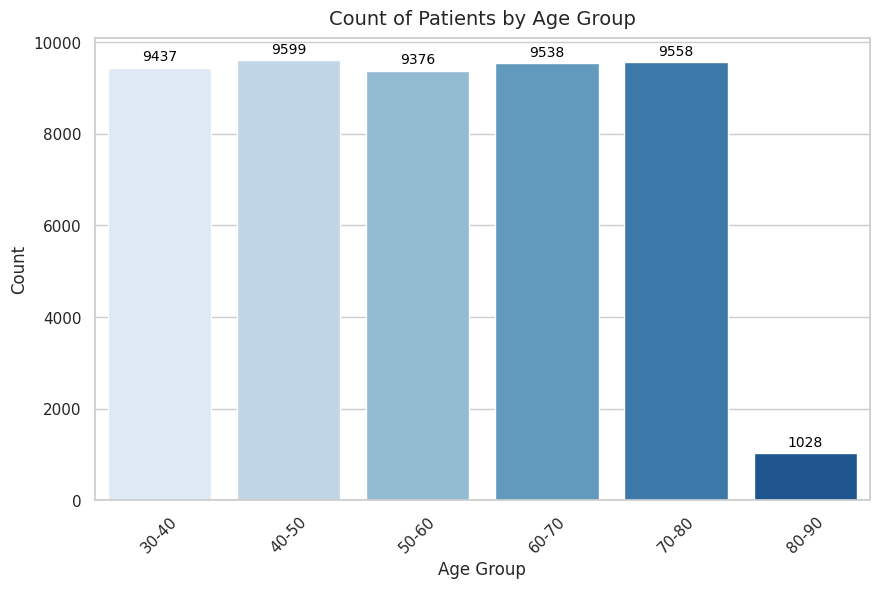

In [ ]:
## Define age group bins and labels
bins = [ 30, 40, 50, 60, 70, 80, 90]
labels = ['30-40', '40-50', '50-60', '60-70', '70-80', '80-90']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Age_Group', palette='Blues')
plt.title('Count of Patients by Age Group', fontsize=14, pad=10)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)


ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')


plt.show()

<ipython-input-14-2f0bcd0434f5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sex', palette='pastel')


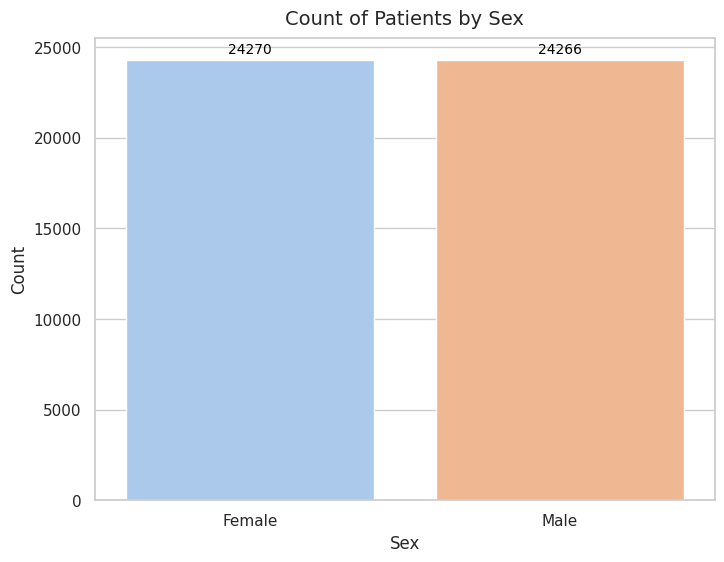

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sex', palette='pastel')
plt.title('Count of Patients by Sex', fontsize=14, pad=10)
plt.xticks([0, 1], ['Female', 'Male'])
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Count', fontsize=12)

ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

<ipython-input-15-e1e2448add7c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Family_History', palette='muted')


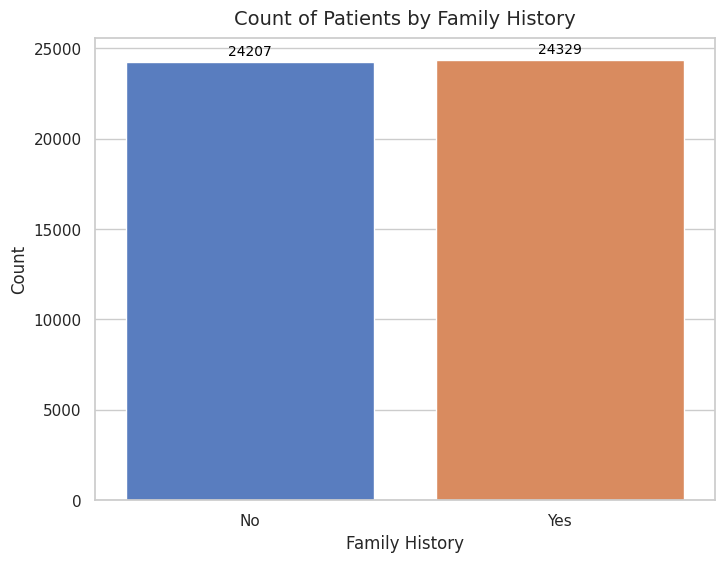

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Family_History', palette='muted')
plt.title('Count of Patients by Family History', fontsize=14, pad=10)
plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('Family History', fontsize=12)
plt.ylabel('Count', fontsize=12)

ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

In [ ]:
df.columns

Index(['Patient_ID', 'Age', 'Sex', 'Family_History', 'HTT_CAG_Repeat_Length',
       'Motor_Symptoms', 'Cognitive_Decline', 'Chorea_Score',
       'Brain_Volume_Loss', 'Functional_Capacity', 'Gene_Mutation_Type',
       'HTT_Gene_Expression_Level', 'Protein_Aggregation_Level',
       'Random_Protein_Sequence', 'Random_Gene_Sequence', 'Disease_Stage',
       'Gene/Factor', 'Chromosome_Location', 'Function', 'Effect', 'Category',
       'Age_Group'],
      dtype='object')

<ipython-input-17-198e6093700c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cognitive_Decline', y='Brain_Volume_Loss', palette='Blues')


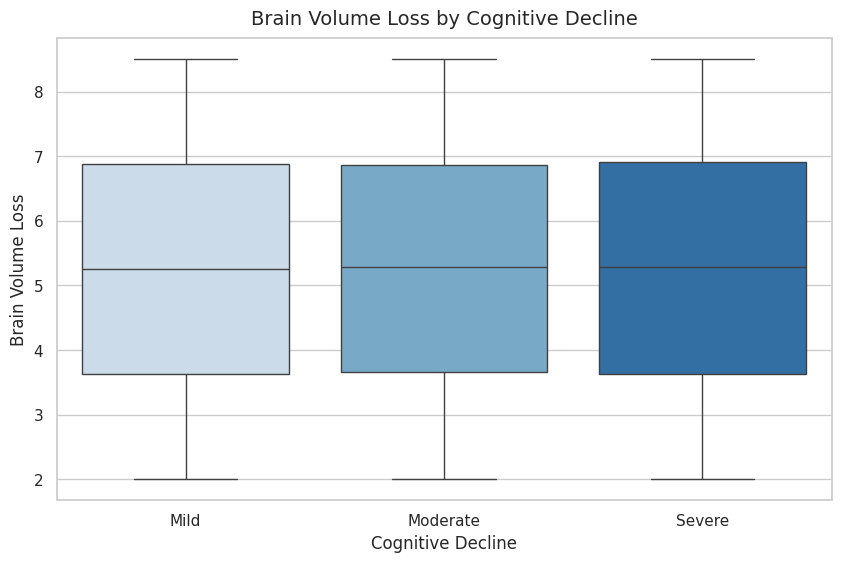

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Cognitive_Decline', y='Brain_Volume_Loss', palette='Blues')
plt.title('Brain Volume Loss by Cognitive Decline', fontsize=14, pad=10)
plt.xticks([0, 1, 2], ['Mild', 'Moderate', 'Severe'])
plt.xlabel('Cognitive Decline', fontsize=12)
plt.ylabel('Brain Volume Loss', fontsize=12)
plt.show()

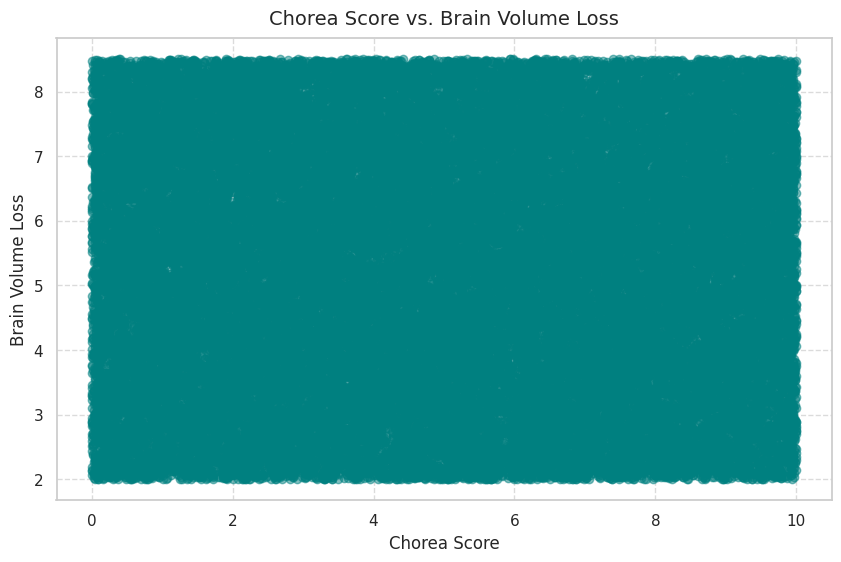

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Chorea_Score'], df['Brain_Volume_Loss'], alpha=0.5, color='teal')
plt.title('Chorea Score vs. Brain Volume Loss', fontsize=14, pad=10)
plt.xlabel('Chorea Score', fontsize=12)
plt.ylabel('Brain Volume Loss', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

<ipython-input-19-2328f2778b10>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Motor_Symptoms', y='Brain_Volume_Loss', palette='Blues')


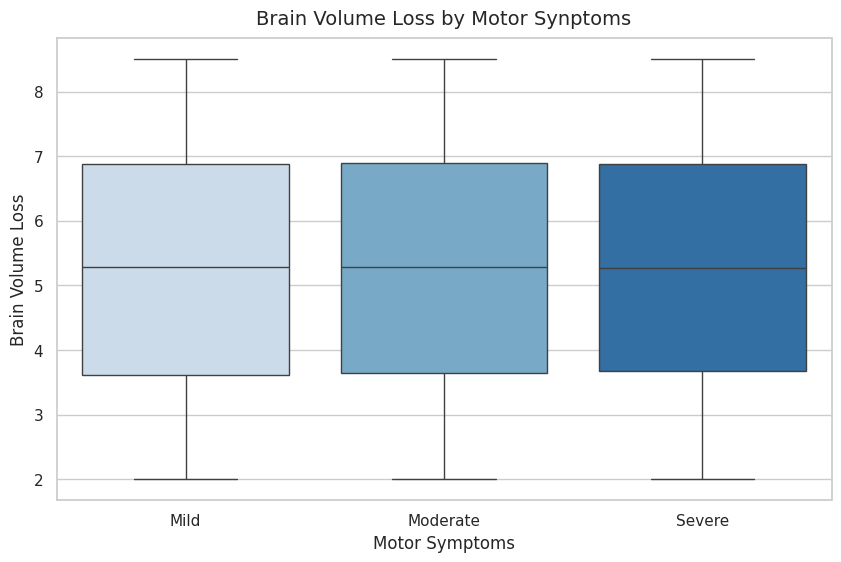

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Motor_Symptoms', y='Brain_Volume_Loss', palette='Blues')
plt.title('Brain Volume Loss by Motor Synptoms', fontsize=14, pad=10)
plt.xticks([0, 1, 2], ['Mild', 'Moderate', 'Severe'])
plt.xlabel('Motor Symptoms', fontsize=12)
plt.ylabel('Brain Volume Loss', fontsize=12)
plt.show()

<Axes: title={'center': 'Functional Capacity vs. Brain Volume Loss'}, xlabel='Functional_Capacity', ylabel='Brain_Volume_Loss'>

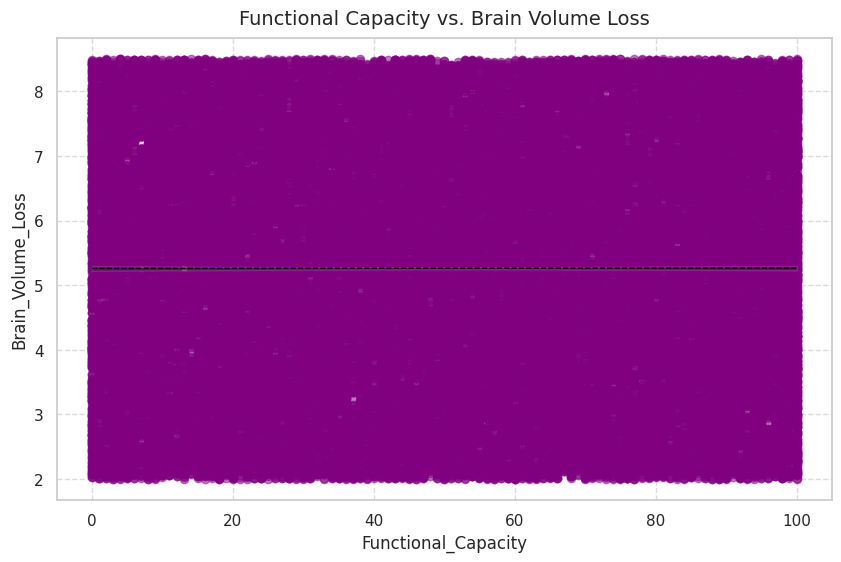

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Functional_Capacity'], df['Brain_Volume_Loss'], alpha=0.5, color='purple')
plt.title('Functional Capacity vs. Brain Volume Loss', fontsize=14, pad=10)
plt.xlabel('Functional Capacity (0-100)', fontsize=12)
plt.ylabel('Brain Volume Loss', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)


sns.regplot(data=df, x='Functional_Capacity', y='Brain_Volume_Loss', scatter=False, color='black',
            line_kws={'linewidth': 1, 'linestyle': '--'})

<ipython-input-21-a210d441e890>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Disease_Stage', y='Brain_Volume_Loss', palette='Blues')


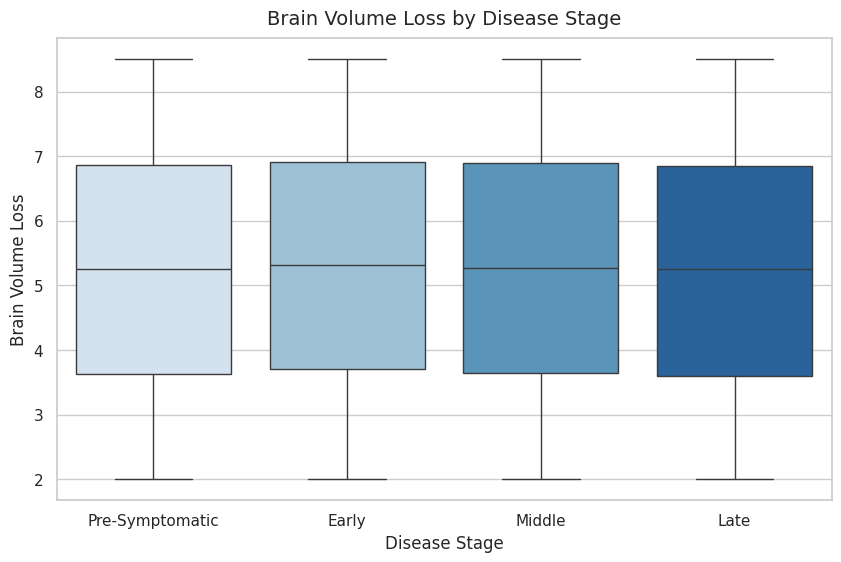


 Summary of Brain Volume Loss by Disease Stage:
                 count      mean       std  min   25%   50%   75%  max
Disease_Stage                                                         
0              12032.0  5.253999  1.868303  2.0  3.63  5.26  6.87  8.5
1              12024.0  5.292573  1.866461  2.0  3.70  5.31  6.91  8.5
2              12289.0  5.264549  1.882180  2.0  3.64  5.27  6.89  8.5
3              12191.0  5.233310  1.874519  2.0  3.60  5.26  6.85  8.5


In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Disease_Stage', y='Brain_Volume_Loss', palette='Blues')
plt.title('Brain Volume Loss by Disease Stage', fontsize=14, pad=10)
plt.xticks([0, 1, 2, 3], ['Pre-Symptomatic', 'Early', 'Middle', 'Late'])
plt.xlabel('Disease Stage', fontsize=12)
plt.ylabel('Brain Volume Loss', fontsize=12)
plt.show()

print("\n Summary of Brain Volume Loss by Disease Stage:")
print(df.groupby('Disease_Stage')['Brain_Volume_Loss'].describe())

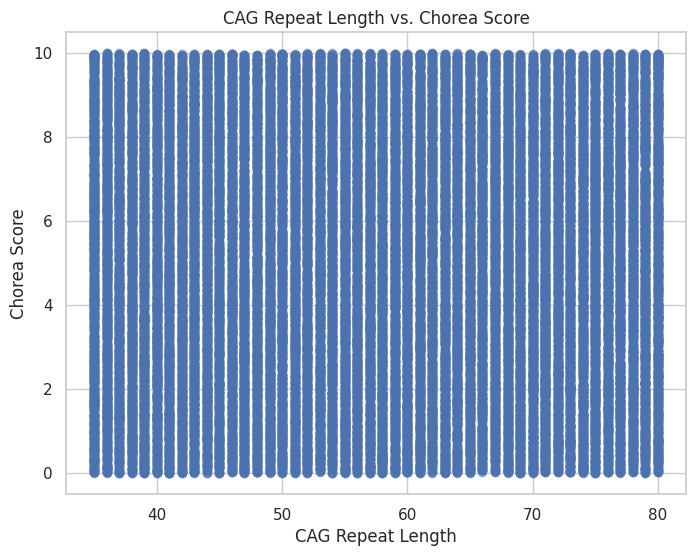

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['HTT_CAG_Repeat_Length'], df['Chorea_Score'], alpha=0.5)
plt.title('CAG Repeat Length vs. Chorea Score')
plt.xlabel('CAG Repeat Length')
plt.ylabel('Chorea Score')
plt.show()

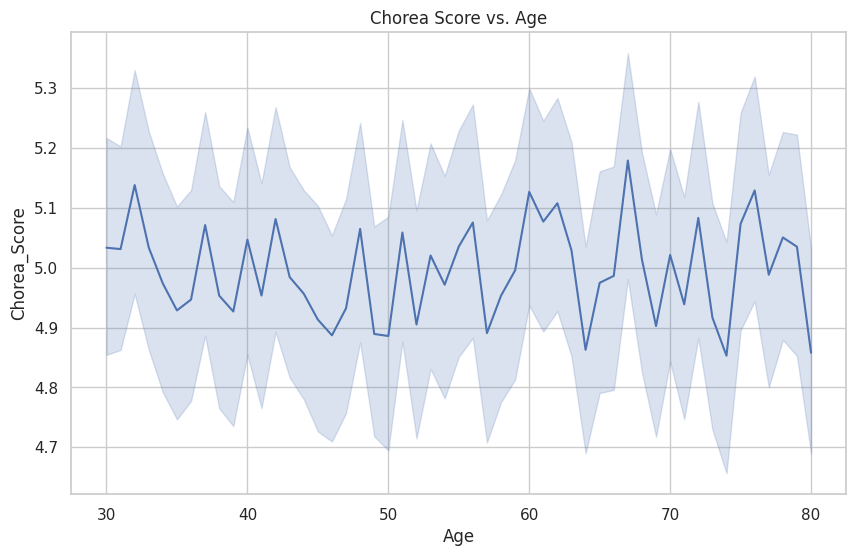

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Age', y='Chorea_Score')
plt.title('Chorea Score vs. Age')
plt.show()

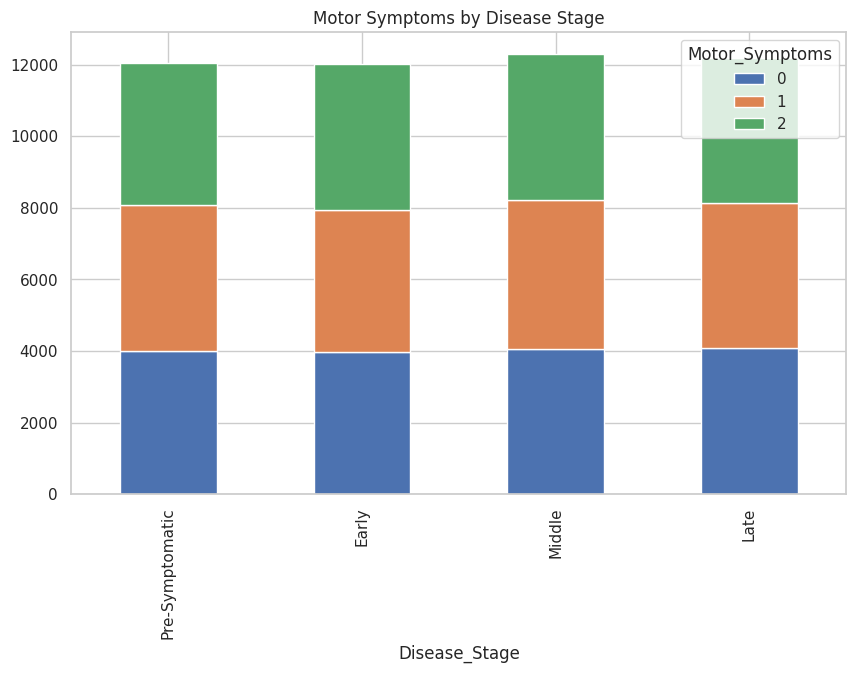

In [ ]:
cross_tab = pd.crosstab(df['Disease_Stage'], df['Motor_Symptoms'])
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xticks([0, 1, 2, 3], ['Pre-Symptomatic', 'Early', 'Middle', 'Late'])
plt.title('Motor Symptoms by Disease Stage')
plt.show()

In [ ]:

disease_stage_mapping = {0: 'Pre-Symptomatic', 1: 'Early', 2: 'Middle', 3: 'Late'}
cognitive_mapping = {0: 'None', 1: 'Mild', 2: 'Moderate', 3: 'Severe'}
motor_mapping = {0: 'None', 1: 'Mild', 2: 'Moderate', 3: 'Severe'}
sex_mapping = {0: 'Female', 1: 'Male'}


for col, mapping in [('Disease_Stage', disease_stage_mapping),
                     ('Cognitive_Decline', cognitive_mapping),
                     ('Motor_Symptoms', motor_mapping),
                     ('Sex', sex_mapping)]:
    if df[col].dtype in ['int32', 'int64', 'float64']:
        df[f'{col}_Label'] = df[col].map(mapping)
    else:
        df[f'{col}_Label'] = df[col]


sns.set(style="whitegrid")


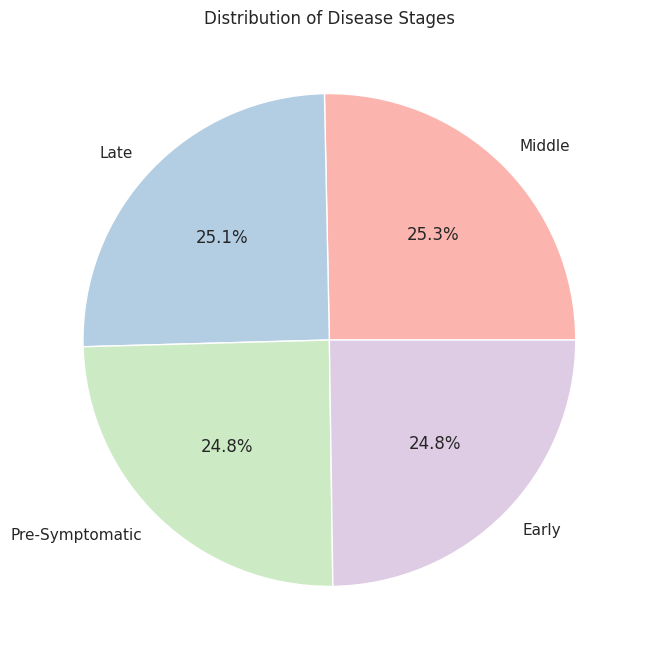

In [ ]:
## 1. Pie Chart: Distribution of Disease Stage
plt.figure(figsize=(8, 8))
df['Disease_Stage_Label'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Pastel1'))
plt.title('Distribution of Disease Stages')
plt.ylabel('')
plt.show()


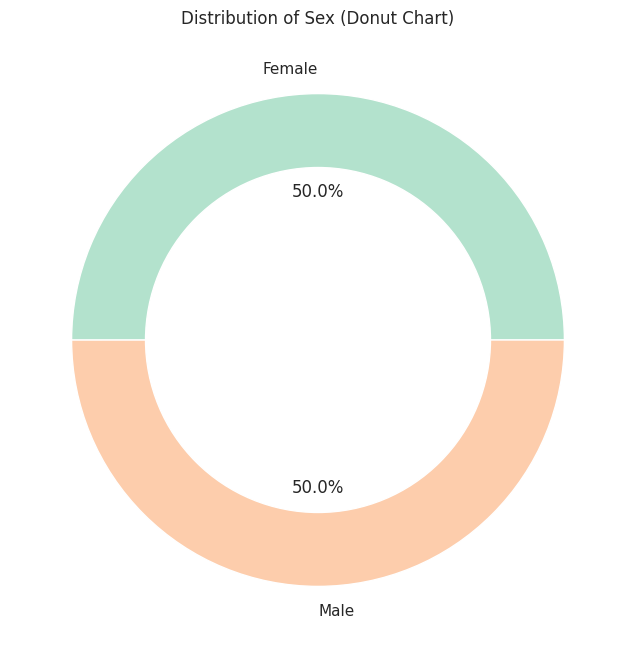

In [ ]:
## 2. Donut Chart: Distribution of Sex
plt.figure(figsize=(8, 8))
sex_counts = df['Sex_Label'].value_counts()
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Pastel2'),
        wedgeprops=dict(width=0.3))
plt.title('Distribution of Sex (Donut Chart)')
plt.show()

<ipython-input-28-c00354f320c2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Family_History', palette='Blues')


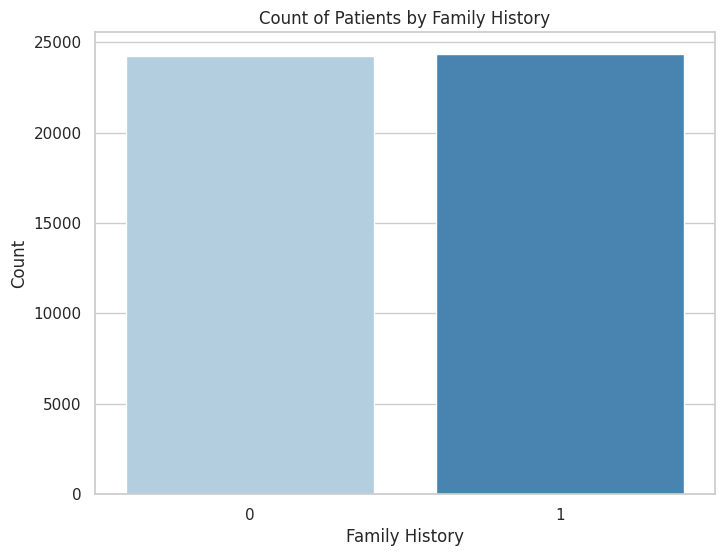

In [ ]:
## 3. Bar Chart: Count of Patients by Family History
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Family_History', palette='Blues')
plt.title('Count of Patients by Family History')
plt.xlabel('Family History')
plt.ylabel('Count')
plt.show()

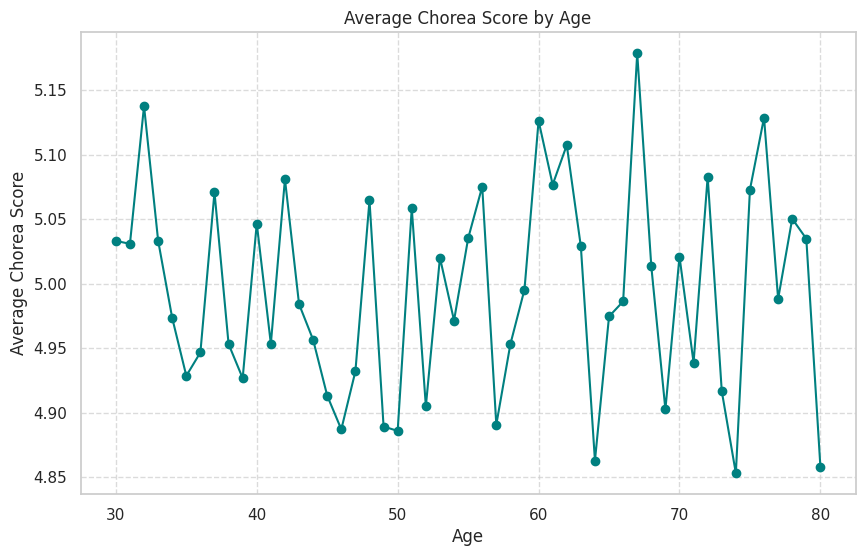

In [ ]:
## 4. Line Chart: Average Chorea Score by Age
plt.figure(figsize=(10, 6))
avg_chorea_by_age = df.groupby('Age')['Chorea_Score'].mean()
plt.plot(avg_chorea_by_age.index, avg_chorea_by_age.values, marker='o', color='teal')
plt.title('Average Chorea Score by Age')
plt.xlabel('Age')
plt.ylabel('Average Chorea Score')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

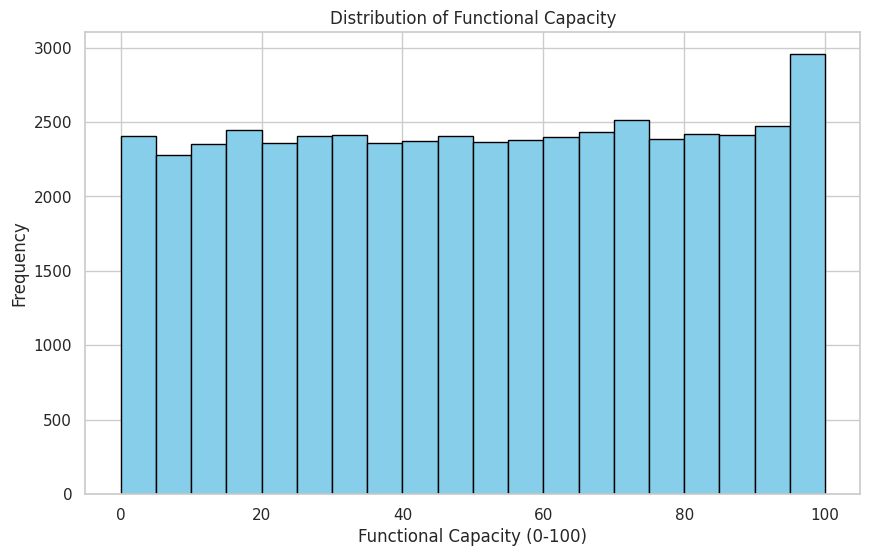

In [ ]:
## 5. Histogram: Distribution of Functional Capacity
plt.figure(figsize=(10, 6))
plt.hist(df['Functional_Capacity'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Functional Capacity')
plt.xlabel('Functional Capacity (0-100)')
plt.ylabel('Frequency')
plt.show()

<Figure size 1000x600 with 0 Axes>

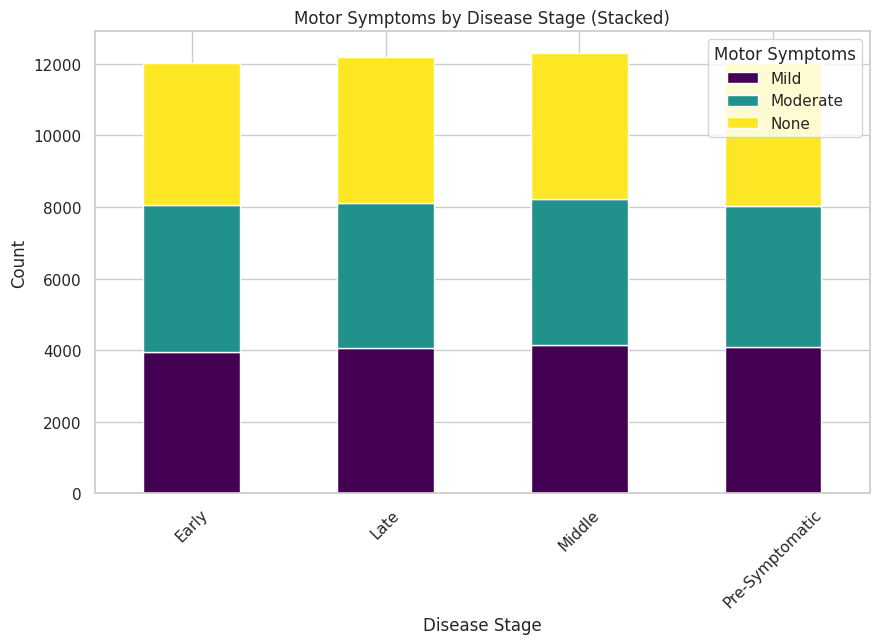

In [ ]:
## 6. Stacked Bar Chart: Motor Symptoms by Disease Stage
plt.figure(figsize=(10, 6))
cross_tab = pd.crosstab(df['Disease_Stage_Label'], df['Motor_Symptoms_Label'])
cross_tab.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))
plt.title('Motor Symptoms by Disease Stage (Stacked)')
plt.xlabel('Disease Stage')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Motor Symptoms')
plt.show()

<Figure size 1000x600 with 0 Axes>

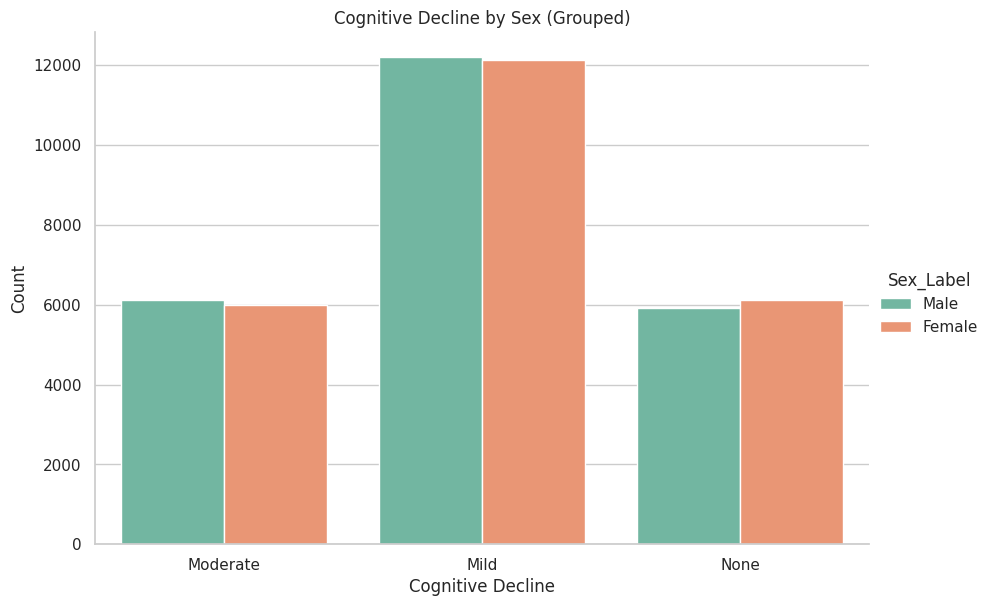

In [ ]:
## 7. Grouped Bar Chart: Cognitive Decline by Sex
plt.figure(figsize=(10, 6))
sns.catplot(data=df, x='Cognitive_Decline_Label', hue='Sex_Label', kind='count', palette='Set2', height=6, aspect=1.5)
plt.title('Cognitive Decline by Sex (Grouped)')
plt.xlabel('Cognitive Decline')
plt.ylabel('Count')
plt.show()

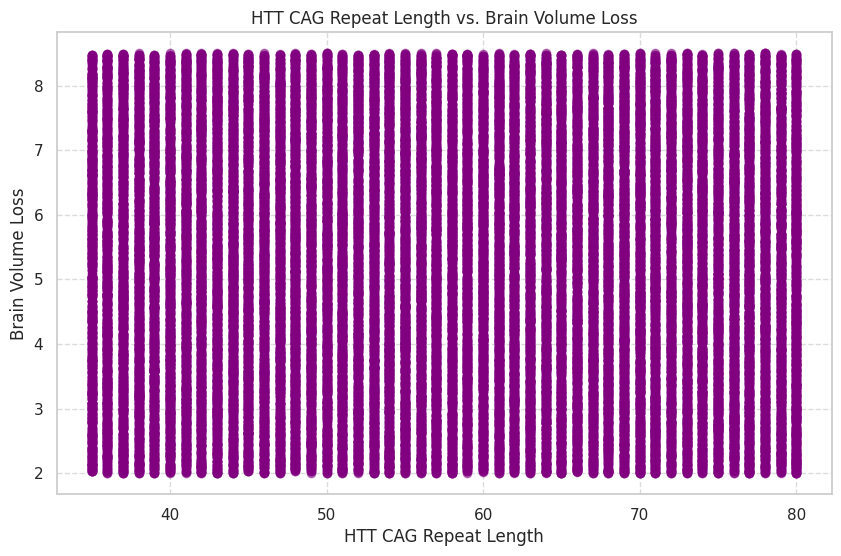

In [ ]:
## 8. Scatter Plot: HTT CAG Repeat Length vs. Brain Volume Loss
plt.figure(figsize=(10, 6))
plt.scatter(df['HTT_CAG_Repeat_Length'], df['Brain_Volume_Loss'], alpha=0.5, color='purple')
plt.title('HTT CAG Repeat Length vs. Brain Volume Loss')
plt.xlabel('HTT CAG Repeat Length')
plt.ylabel('Brain Volume Loss')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

<ipython-input-34-bc564b31aa99>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Disease_Stage_Label', y='Brain_Volume_Loss', palette='Purples',


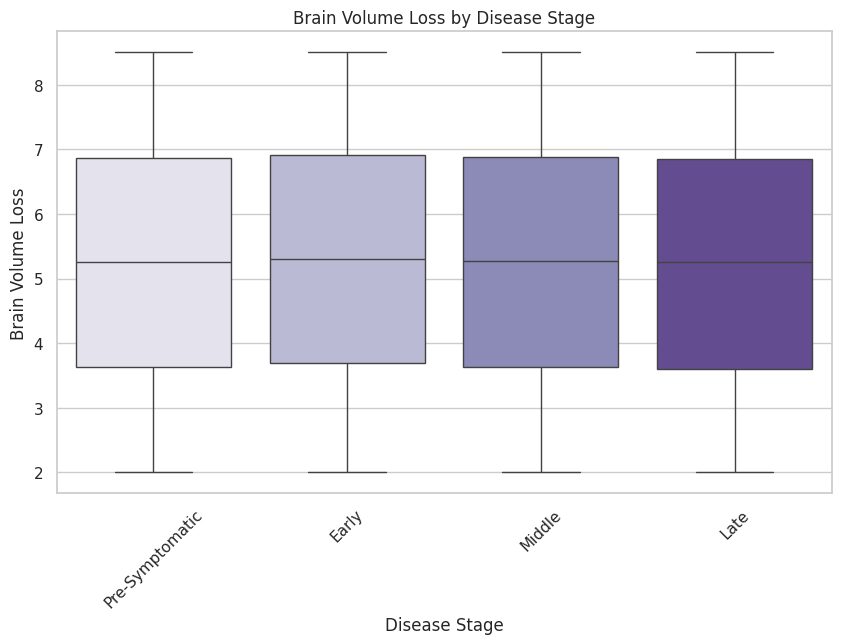

In [ ]:
## 9. Box Plot: Brain Volume Loss by Disease Stage
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Disease_Stage_Label', y='Brain_Volume_Loss', palette='Purples',
            order=['Pre-Symptomatic', 'Early', 'Middle', 'Late'])
plt.title('Brain Volume Loss by Disease Stage')
plt.xlabel('Disease Stage')
plt.ylabel('Brain Volume Loss')
plt.xticks(rotation=45)
plt.show()

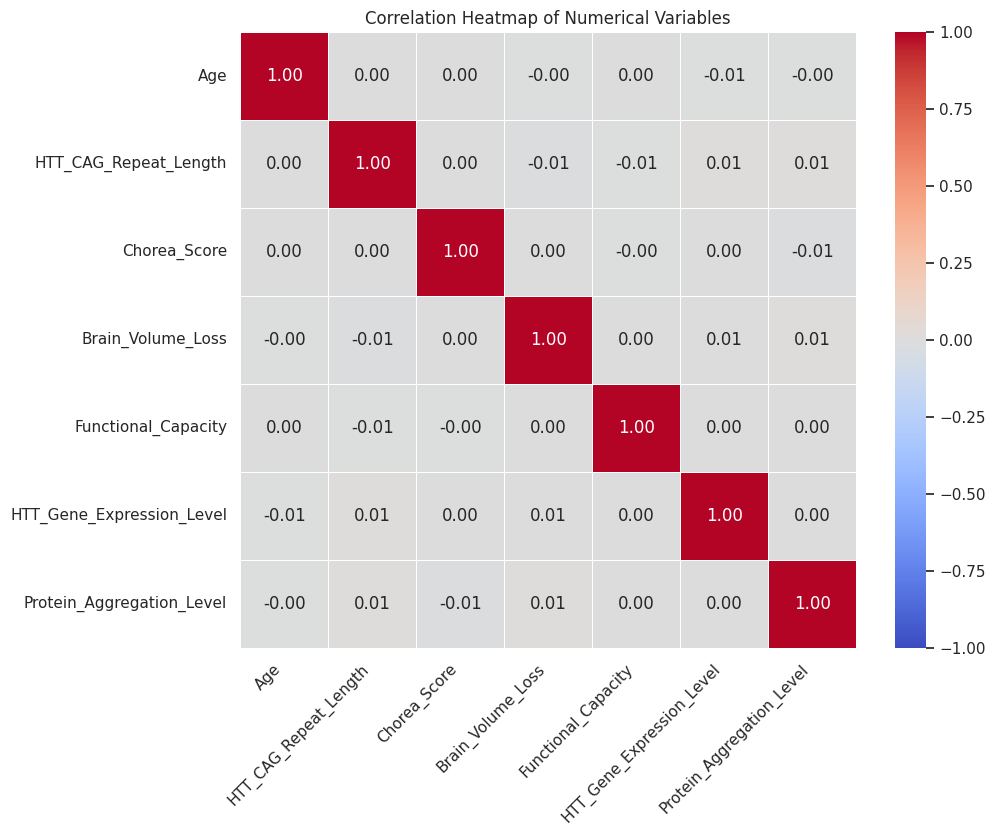

In [ ]:
## 10. Heatmap: Correlation of Numerical Variables
numerical_cols = ['Age', 'HTT_CAG_Repeat_Length', 'Chorea_Score', 'Brain_Volume_Loss',
                  'Functional_Capacity', 'HTT_Gene_Expression_Level', 'Protein_Aggregation_Level']
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0,
            square=True, linewidths=0.5, fmt='.2f')
plt.title('Correlation Heatmap of Numerical Variables')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

In [ ]:
## 11. Spider/Radar Chart: Average Metrics by Disease Stage (using Plotly)
import plotly.graph_objects as go

metrics = ['Chorea_Score', 'Brain_Volume_Loss', 'Functional_Capacity']
stages = ['Pre-Symptomatic', 'Early', 'Middle', 'Late']
radar_data = df.groupby('Disease_Stage_Label')[metrics].mean().reindex(stages)

fig = go.Figure()
for stage in stages:
    fig.add_trace(go.Scatterpolar(
        r=radar_data.loc[stage].values,
        theta=metrics,
        fill='toself',
        name=stage
    ))
fig.update_layout(
    polar=dict(radialaxis=dict(visible=True)),
    showlegend=True,
    title='Average Metrics by Disease Stage (Radar Chart)'
)
fig.write_html('radar_metrics_by_stage.html')

In [ ]:
df.head()

,Patient_ID,Age,Sex,Family_History,HTT_CAG_Repeat_Length,Motor_Symptoms,Cognitive_Decline,Chorea_Score,Brain_Volume_Loss,Functional_Capacity,...,Gene/Factor,Chromosome_Location,Function,Effect,Category,Age_Group,Disease_Stage_Label,Cognitive_Decline_Label,Motor_Symptoms_Label,Sex_Label
0,b2a49170-8561-4665-9371-2240b55dd87a,31,1,0,67,1,2,8.80,3.20,94,...,0,4p16.3,1,2,1,30-40,Middle,Moderate,Mild,Male
1,f5fae45d-8718-41c4-a957-6928f79f3c8e,33,0,1,38,2,1,3.24,5.98,50,...,0,4p16.3,1,2,1,30-40,Late,Mild,Moderate,Female
2,66ab0567-050b-4d56-9ec4-b676309899a6,69,1,1,37,2,1,1.01,2.82,69,...,3,5q14.1,2,0,2,60-70,Pre-Symptomatic,Mild,Moderate,Male
3,996a48e4-e841-418f-a539-5a7a86cd815d,66,1,1,50,0,2,3.21,6.77,76,...,3,5q14.1,2,0,2,60-70,Late,Moderate,None,Male
4,d45c7ca8-7125-4aaa-8018-5bbc60d35a1f,43,0,1,48,1,0,2.31,7.53,70,...,1,4p16.3,0,1,0,40-50,Early,None,Mild,Female


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from pyspark.sql import SparkSession

In [ ]:
df.columns

Index(['Patient_ID', 'Age', 'Sex', 'Family_History', 'HTT_CAG_Repeat_Length',
       'Motor_Symptoms', 'Cognitive_Decline', 'Chorea_Score',
       'Brain_Volume_Loss', 'Functional_Capacity', 'Gene_Mutation_Type',
       'HTT_Gene_Expression_Level', 'Protein_Aggregation_Level',
       'Random_Protein_Sequence', 'Random_Gene_Sequence', 'Disease_Stage',
       'Gene/Factor', 'Chromosome_Location', 'Function', 'Effect', 'Category',
       'Age_Group', 'Disease_Stage_Label', 'Cognitive_Decline_Label',
       'Motor_Symptoms_Label', 'Sex_Label'],
      dtype='object')

In [ ]:
features = ['Age', 'HTT_CAG_Repeat_Length', 'Chorea_Score', 'Brain_Volume_Loss',
            'Functional_Capacity', 'Sex', 'Family_History', 'Cognitive_Decline', 'Motor_Symptoms']
target = 'Disease_Stage'

In [ ]:
df = df[features + [target]].dropna()

In [ ]:
df.head()

,Age,HTT_CAG_Repeat_Length,Chorea_Score,Brain_Volume_Loss,Functional_Capacity,Sex,Family_History,Cognitive_Decline,Motor_Symptoms,Disease_Stage
0,31,67,8.80,3.20,94,1,0,2,1,2
1,33,38,3.24,5.98,50,0,1,1,2,3
2,69,37,1.01,2.82,69,1,1,1,2,0
3,66,50,3.21,6.77,76,1,1,2,0,3
4,43,48,2.31,7.53,70,0,1,0,1,1


In [ ]:
for col in ['Sex', 'Family_History', 'Cognitive_Decline', 'Motor_Symptoms', 'Disease_Stage']:
    df[col] = le.fit_transform(df[col])

In [ ]:

X = df[features]
y = df[target]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(random_state=42)
}

In [ ]:
results = {}
for name, model in models.items():

    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)


    report = classification_report(y_test, y_pred, output_dict=True)


    results[name] = {
        'Accuracy': accuracy,
        'Precision (weighted)': report['weighted avg']['precision'],
        'Recall (weighted)': report['weighted avg']['recall'],
        'F1-Score (weighted)': report['weighted avg']['f1-score']
    }


    print(f"\nResults for {name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))


Results for Logistic Regression:
Accuracy: 0.26
Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.16      0.20      2457
           1       0.25      0.18      0.21      2394
           2       0.26      0.29      0.27      2456
           3       0.26      0.41      0.32      2401

    accuracy                           0.26      9708
   macro avg       0.26      0.26      0.25      9708
weighted avg       0.26      0.26      0.25      9708


Results for Random Forest:
Accuracy: 0.26
Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.25      0.25      2457
           1       0.26      0.26      0.26      2394
           2       0.26      0.27      0.26      2456
           3       0.27      0.26      0.26      2401

    accuracy                           0.26      9708
   macro avg       0.26      0.26      0.26      9708
weighted avg       0.26      0.26      0.26    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/p